# Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
import pandas as pd
import random as rand
import string
import math
chars = string.ascii_uppercase + string.digits
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)
import seaborn as sns
import sklearn as skl
import skimage as ski
from sklearn.preprocessing import LabelEncoder
from scipy import spatial
from sklearn.utils import shuffle
from os import system
import skimage as ski
from skimage.color import rgb2gray
from scipy import misc
from skimage.exposure import adjust_gamma
from sklearn import preprocessing
from scipy import stats
from glob import glob

# importing and formating the tables

In [2]:
file1 = pd.read_csv('twelve.species.2017.ultimate.txt' , sep= "	")
file1['segmentSize']= file1['posterior']- file1['anterior']
file1.tail()

species  larva segment  anterior  posterior  denticle.width  segmentSize
11587    Dyak    143      A4     52.60      56.33            3.73         3.73
11588    Dyak    143      A5     60.08      63.60            3.52         3.52
11589    Dyak    143      A6     67.58      71.09            3.51         3.51
11590    Dyak    143      A7     74.74      78.33            3.59         3.59
11591    Dyak    143      A8     82.43      84.63            2.20         2.20

In [3]:
file1['segPosAvg']= (file1['posterior']+ file1['anterior'])/2

In [4]:
file1.head()

species  larva segment  anterior  posterior  denticle.width  segmentSize  \
0    Dana      1      A1     31.23      32.82            1.59         1.59   
1    Dana      1      A2     37.94      41.33            3.39         3.39   
2    Dana      1      A3     45.86      49.07            3.21         3.21   
3    Dana      1      A4     53.30      56.41            3.11         3.11   
4    Dana      1      A5     60.60      63.74            3.14         3.14   

   segPosAvg  
0     32.025  
1     39.635  
2     47.465  
3     54.855  
4     62.170

In [5]:
a = file1[(file1['segment'] == 'A8' )& (file1['species']== 'Dmoj')]
a['segmentSize'].mean()

1.6854545454545458

In [6]:
file2 = pd.read_csv('twelve.species.2017.fullbodylength.txt', sep ='	')
file2.head()
file2[(file2.species == 'Dana')  & (file2.larva == 1)]['body.length'].values[0]

6081

In [7]:
populations = {}
for spe in file1.species.unique():
    populations[spe] = file1[file1.species == spe]
print(populations['Dana'].head())
species_list = list(populations.keys())
species_list = ['Dsim', 'Dsec', 'Dmel', 'Dyak', 'Dere', 'Dana','Dpse', 'Dper', 'Dwil', 'Dvir', 'Dmoj']
segments_names = populations['Dana'].segment.unique()

    

  species  larva segment  anterior  posterior  denticle.width  segmentSize  \
0    Dana      1      A1     31.23      32.82            1.59         1.59   
1    Dana      1      A2     37.94      41.33            3.39         3.39   
2    Dana      1      A3     45.86      49.07            3.21         3.21   
3    Dana      1      A4     53.30      56.41            3.11         3.11   
4    Dana      1      A5     60.60      63.74            3.14         3.14   

   segPosAvg  
0     32.025  
1     39.635  
2     47.465  
3     54.855  
4     62.170  


## trying to organize the data and not failing anymore :)

In [8]:
%%time
newpop = {}
for spe in species_list:
    tmpDF = pd.DataFrame()
    for larva in populations[spe].larva.unique():
        tmpDF2 = pd.DataFrame()
        for seg in segments_names:
            afly = populations[spe][populations[spe].larva == larva]
            tmpDF2[seg] = pd.Series([afly[afly.segment == seg].segPosAvg.values[0]
                                    ])#* file2[(file2.species == spe)  & (file2.larva == larva)]['body.length'].values[0]])
            #changed from segment size to position
            #tmpDF2['D.width'+seg] = pd.Series(afly[afly.segment == seg].segmentSize.values)
        tmpDF = pd.concat([tmpDF, tmpDF2])
    newpop[spe] = tmpDF.reset_index(drop=True)
    
    

CPU times: user 14.9 s, sys: 53.5 ms, total: 15 s
Wall time: 15 s


In [9]:
#from prettyplot import *
#color = ['seagreen','g' ,'darkgreen', 'lime', 'aquamarine', 'c','dodgerblue', 'b', 'darkorange', 'r', 'firebrick']

for i in species_list:
    newpop[i]['species'] = newpop[i].A1.apply(lambda x:i)
#axarr, color_map = factor_scatter_matrix(pd.concat([newpop[i] for i in species_list]).reset_index(drop = True),'species', color)
#plt.savefig('plots/scatterplotmatrixnonnormalized')


####changing reading of the file 
for i in species_list:
    posterior = newpop[i].shift(-1,axis= 1)
    posterior['A8'] = posterior['A8'].apply(lambda x: 1)
    subtraction = posterior - newpop[i]
    subtraction['species'] = subtraction['species'].apply(lambda x: i)
    subtraction['head'] = newpop[i]['A1']
    subtraction = subtraction[['head']+ ['A'+ str(oao) for oao in range(1,9)]+ ['species']]
    newpop[i] = subtraction
####### ended here

for i in species_list:
    newpop[i] = newpop[i].drop(['species'],axis =1 )
    
#print(color_map)


# normalize the variables

In [10]:
### first normalization test
#for spe in species_list:
#    newpop[spe] =newpop[spe].apply(lambda x: (x - x.mean())/x.std(), axis=0)
    
    

In [11]:
newpop['Dana'].head()

head     A1     A2     A3     A4     A5     A6     A7      A8
0  32.025  7.610  7.830  7.390  7.315  7.480  7.695  7.460 -83.805
1  31.790  7.215  7.650  7.585  7.680  7.880  8.110  7.845 -84.755
2  31.260  7.955  7.820  7.575  7.255  7.770  7.860  7.455 -83.950
3  32.135  7.565  7.565  7.190  7.425  7.535  7.515  6.835 -82.765
4  32.280  7.430  7.720  7.150  7.270  7.605  8.165  7.880 -84.500

In [12]:
newpop2 = newpop.copy()
for i in species_list:
    newpop2[i]['species'] = newpop2[i].A1.apply(lambda x:i)
allpops = pd.concat([newpop2[i] for i in species_list]).reset_index(drop = True)

df_num = allpops.select_dtypes(include=[np.number])
df_norm = df_num.apply(lambda x: (x - x.mean())/x.std(), axis=0)
allpops[df_norm.columns] = df_norm

for i in species_list:
    newpop[i] = allpops[allpops['species'] == i]


allpops.head()

head        A1        A2        A3        A4        A5        A6  \
0  0.764257 -0.454994 -0.295675  0.781048  0.679011 -0.552664 -0.743309   
1  0.613180 -0.166377 -0.054582  0.576103  0.549772  0.003482  0.589522   
2  0.116783 -1.032228 -0.423313  0.125222  0.205134 -0.436261  0.566932   
3  0.462103 -0.248839  0.796336  0.972331  0.793890  1.361512  1.097806   
4  0.284047 -1.045972 -0.806226  0.835700 -0.441062 -0.293992  0.420095   

         A7        A8 species  
0 -1.501728  0.226068    Dsim  
1  0.906650 -0.761955    Dsim  
2  0.793124 -0.121075    Dsim  
3  1.263447 -1.353879    Dsim  
4  0.752579 -0.127751    Dsim

# calculating mean phenotype vector for each species

In [13]:
MeanPheVectorAllSpe = {}
for spe in species_list:
    MeanPheVectorAllSpe[spe] = newpop[spe].iloc[:, :].mean(axis=0)
MeanPheVectorAllSpe['Dvir']

head   -1.397952
A1      0.540997
A2      0.554364
A3      0.729782
A4      1.071303
A5      1.375476
A6      0.357322
A7      0.077808
A8     -0.211307
dtype: float64

# calculationg correlation between segments for whole population

In [14]:
from pandas.plotting import scatter_matrix
#a = scatter_matrix(allpops, diagonal='kde', figsize = (30,30));

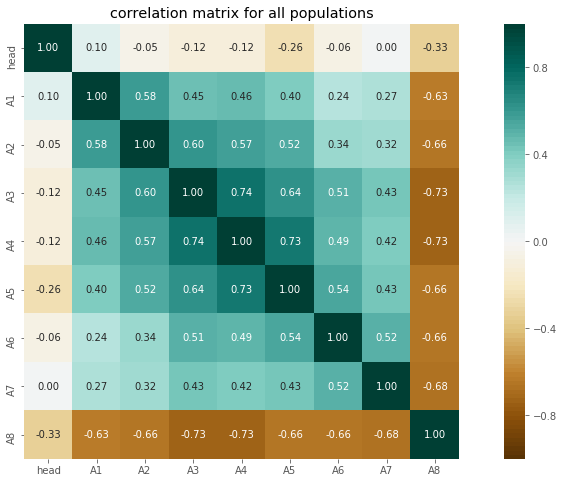

In [44]:
sns.heatmap(allpops.corr(), annot=True, fmt=".2f", cmap = sns.color_palette("BrBG", n_colors=100), vmin = -1, vmax= 1, square=True)#sns.color_palette("GnBu_d", n_colors=100)
plt.title('correlation matrix for all populations')
plt.savefig('plots/correlation matrix for all populations')


{'Dsim': 'seagreen', 'Dsec': 'g', 'Dmel': 'darkgreen', 'Dyak': 'lime', 'Dere': 'aquamarine', 'Dana': 'c', 'Dpse': 'dodgerblue', 'Dper': 'b', 'Dwil': 'darkorange', 'Dvir': 'r', 'Dmoj': 'firebrick'}


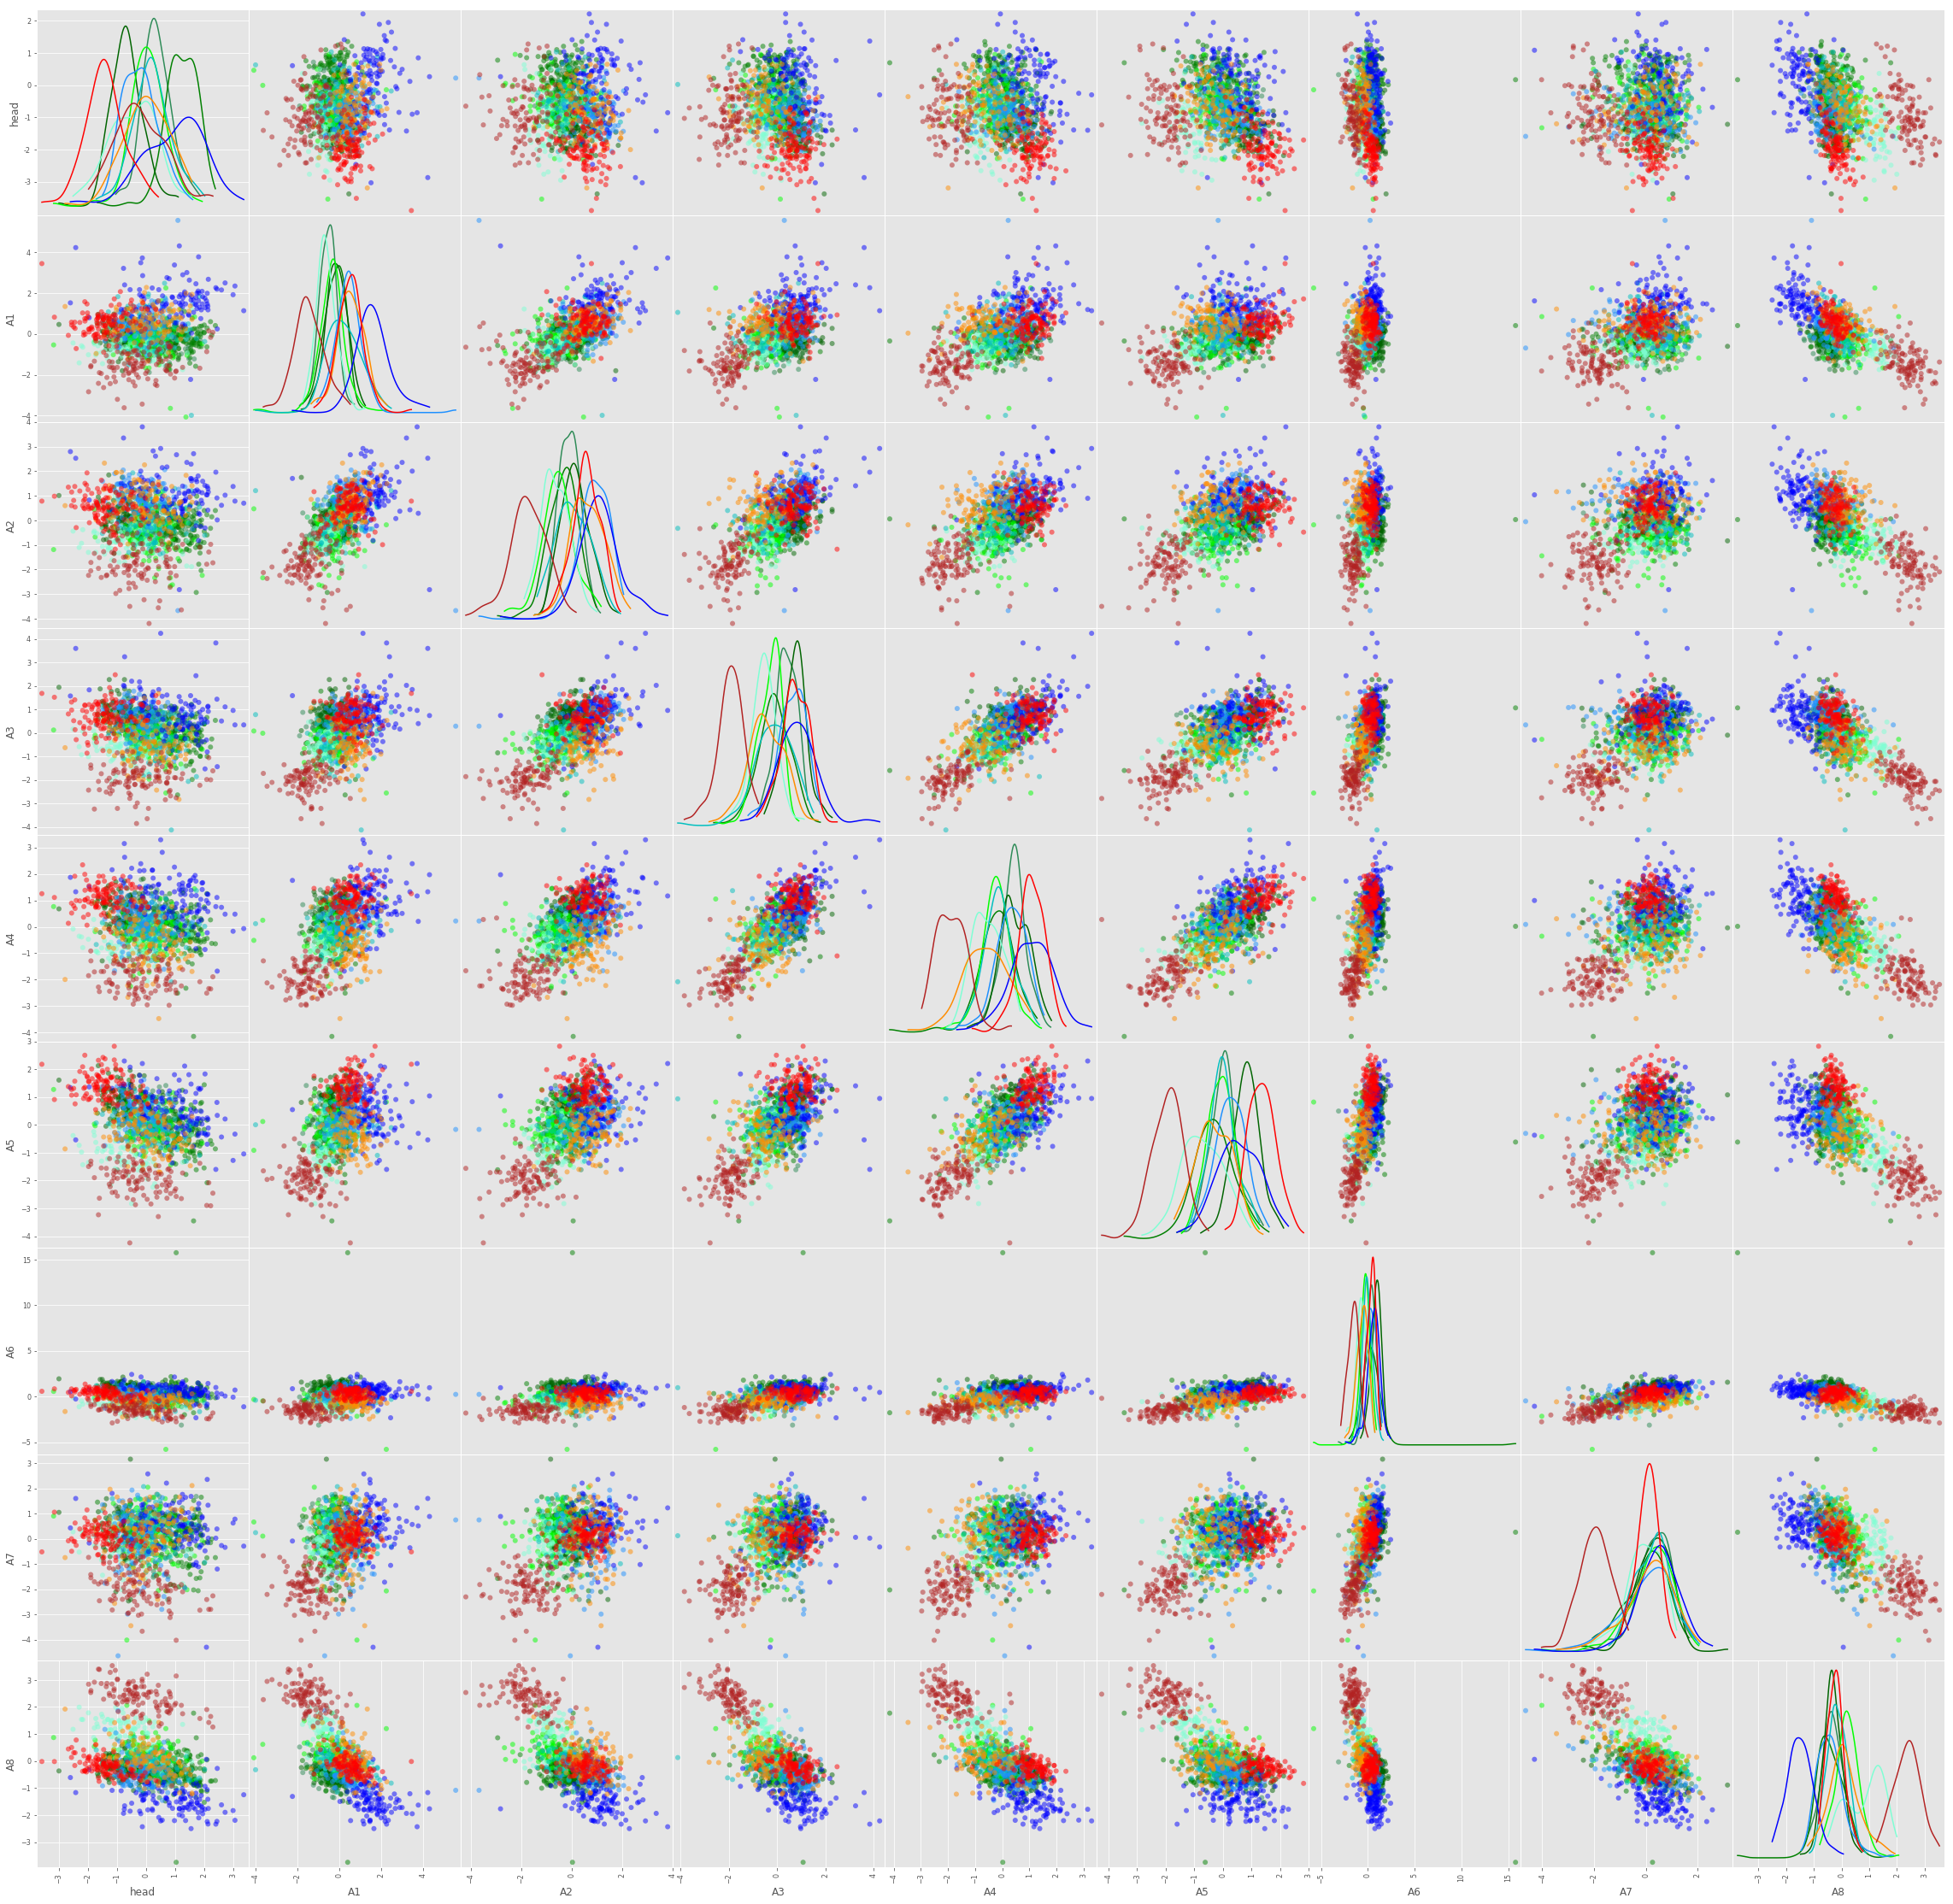

In [16]:
from prettyplot import *
color = ['seagreen','g' ,'darkgreen', 'lime', 'aquamarine', 'c','dodgerblue', 'b', 'darkorange', 'r', 'firebrick']
axarr, color_map = factor_scatter_matrix(allpops,'species', color)
plt.savefig('plots/scatterplotmatrix')

print(color_map)


# Making covariance matrices for all populations (P matrices) 
### By the Cheverud conjecture, we can asssume P and G matrices are similar and possibly interchangable

In [17]:
#a =sns.pairplot(allpops, hue='species', diag_kind="kde", plot_kws=dict(s=10),palette= sns.hls_palette(8, l=.3, s=.8))
#a.set(xticklabels=[])
#a.set(yticklabels=[])

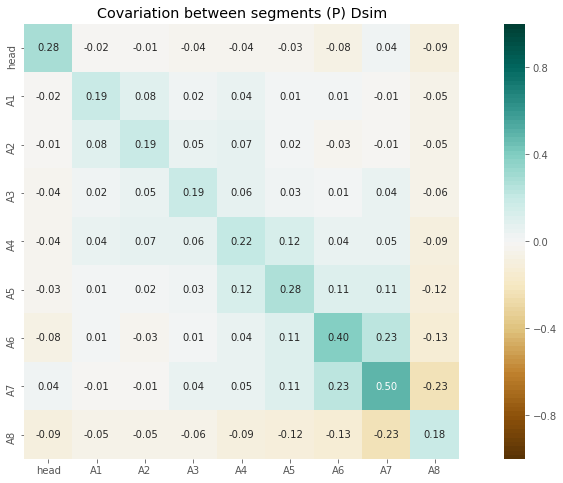

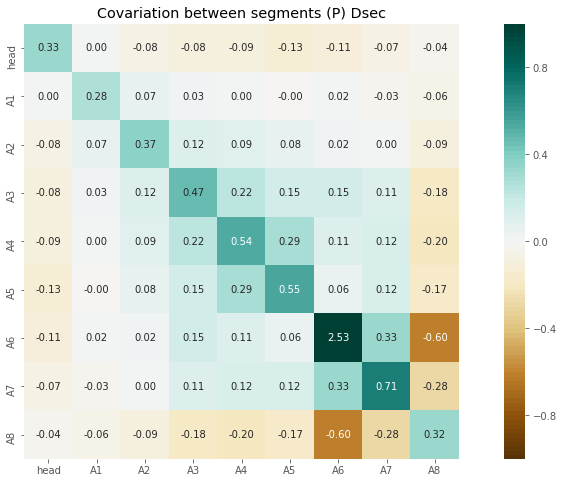

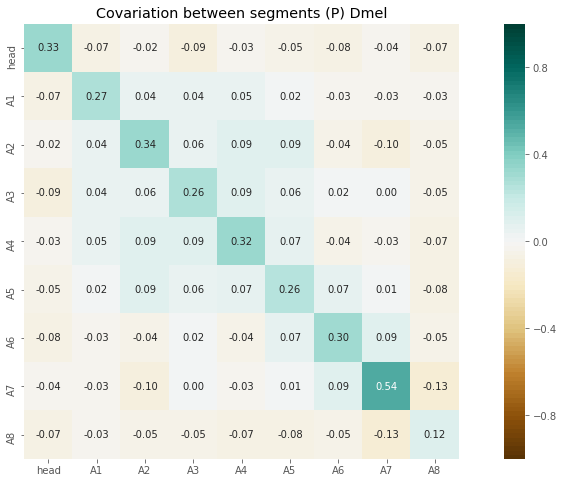

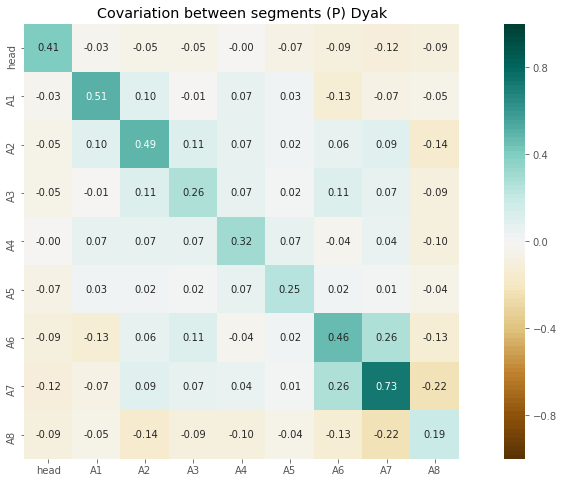

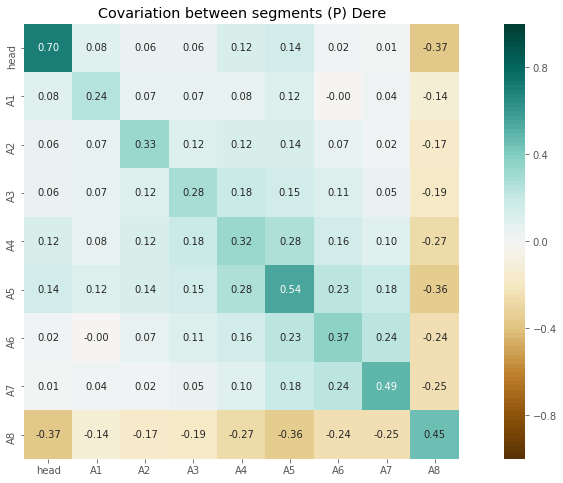

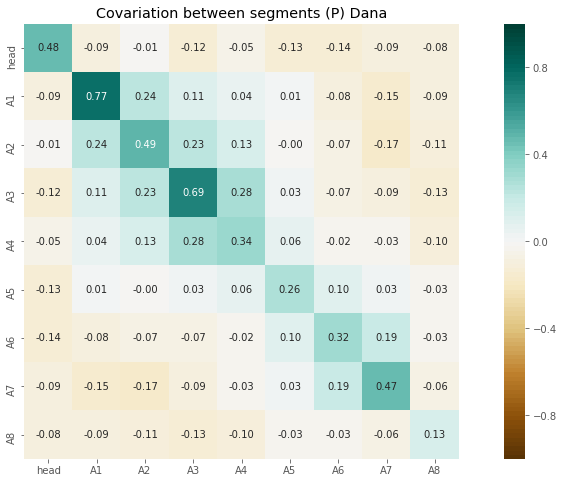

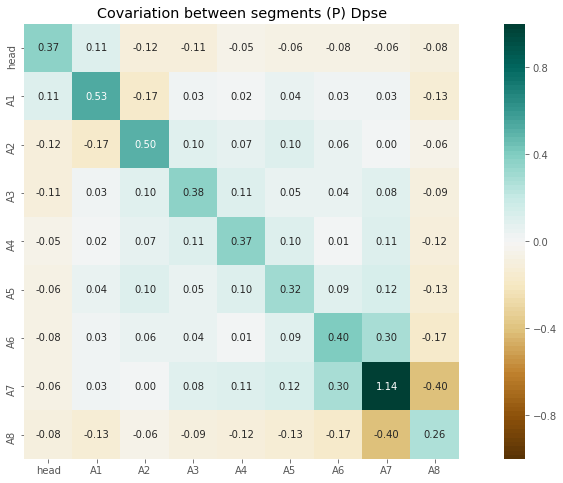

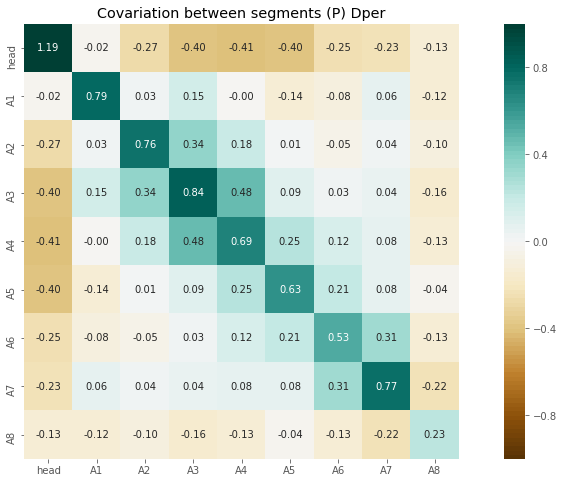

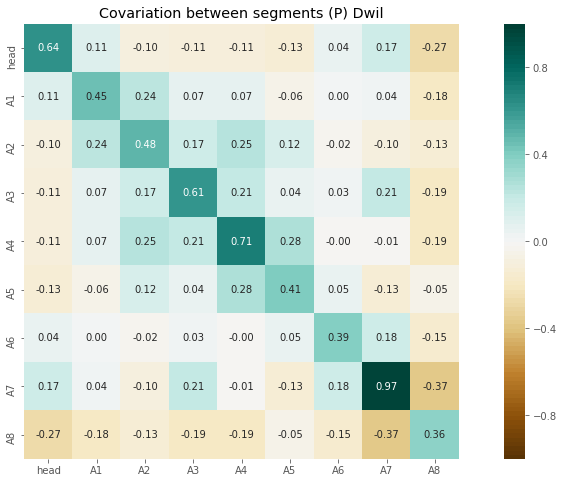

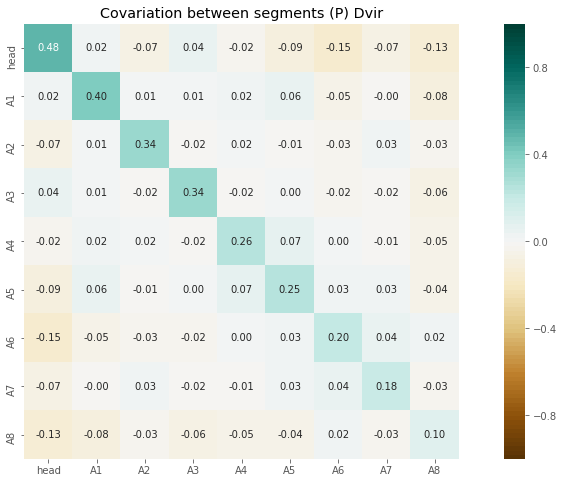

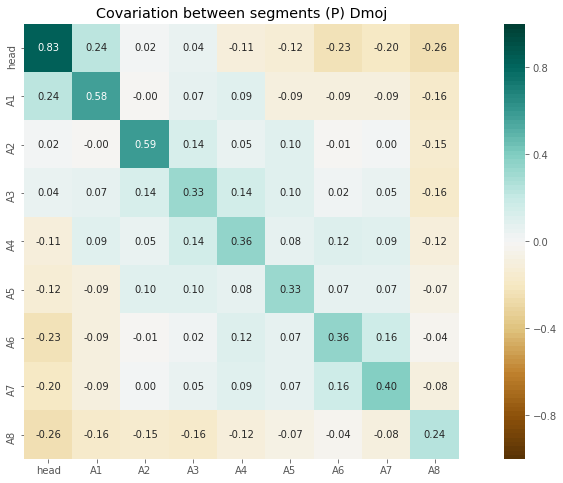

In [46]:
PmatrixAllSpe = {}
for i in species_list:
    sns.heatmap(newpop[i].cov(), annot=True, fmt=".2f",vmin = -1, vmax = 1, cmap=sns.color_palette("BrBG", n_colors=100), square=True)
    PmatrixAllSpe[i] = newpop[i].cov()
    plt.title('Covariation between segments (P) '+ i)
    plt.savefig('plots/Covariation between segments '+ i)
    plt.show()
    



# infering  expected ancestral phenotypes

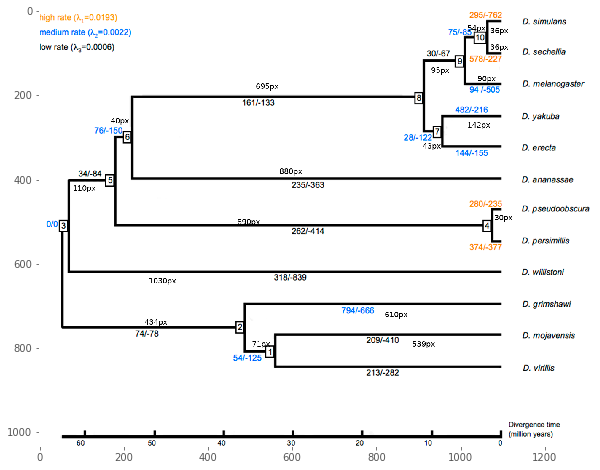

In [19]:
plt.imshow(misc.imread("tree.png"))
plt.grid(False)

### Ancestral Drosophila names

####     SiSe                                                                       1
####     SiSe)Me                                                               2
####     YaEr                                                                       3
####     SiSe)Me)YaEr                                                     4 
####     SiSe)Me)YaEr)An                                               5
####     PsPe                                                                      6   
####     SiSe)Me)YaEr)An)PsPe                                    7 
####     SiSe)Me)YaEr)An)PsPe)Wi                              8
####     ViMo                                                                       9
####     SiSe)Me)YaEr)An)PsPe)Wi)ViMo                  11


In [20]:
MeanPheVectorAncestral = {}
MeanPheVectorAncestral['SiSe'] = (MeanPheVectorAllSpe['Dsim'] + MeanPheVectorAllSpe['Dsec'])/2
MeanPheVectorAncestral['SiSe)Me'] = ((1/54)*MeanPheVectorAncestral['SiSe'] + (1/90)*MeanPheVectorAllSpe['Dmel'])/(1/54+1/90)
MeanPheVectorAncestral['YaEr'] = (MeanPheVectorAllSpe['Dyak'] + MeanPheVectorAllSpe['Dere'])/2
MeanPheVectorAncestral['SiSe)Me)YaEr'] = ((1/95)*MeanPheVectorAncestral['SiSe)Me'] + (1/43)*MeanPheVectorAncestral['YaEr'])/(1/95+1/43)
MeanPheVectorAncestral['SiSe)Me)YaEr)An'] = ((1/695)*MeanPheVectorAncestral['SiSe)Me)YaEr'] + (1/880)*MeanPheVectorAllSpe['Dana'])/(1/695+1/880)
MeanPheVectorAncestral['PsPe'] = (MeanPheVectorAllSpe['Dpse'] + MeanPheVectorAllSpe['Dper'])/2
MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe'] = ((1/40)*MeanPheVectorAncestral['SiSe)Me)YaEr)An'] + (1/890)*MeanPheVectorAncestral['PsPe'])/(1/40+1/890)
MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi'] = ((1/110)*MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe'] + (1/1030)*MeanPheVectorAllSpe['Dwil'])/(1/110+ 1/1030)
MeanPheVectorAncestral['ViMo'] = (MeanPheVectorAllSpe['Dvir'] + MeanPheVectorAllSpe['Dmoj'])/2
MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo'] = ((1/4)*MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi'] + (1/434)*MeanPheVectorAncestral['ViMo'])/(1/434+1/4)




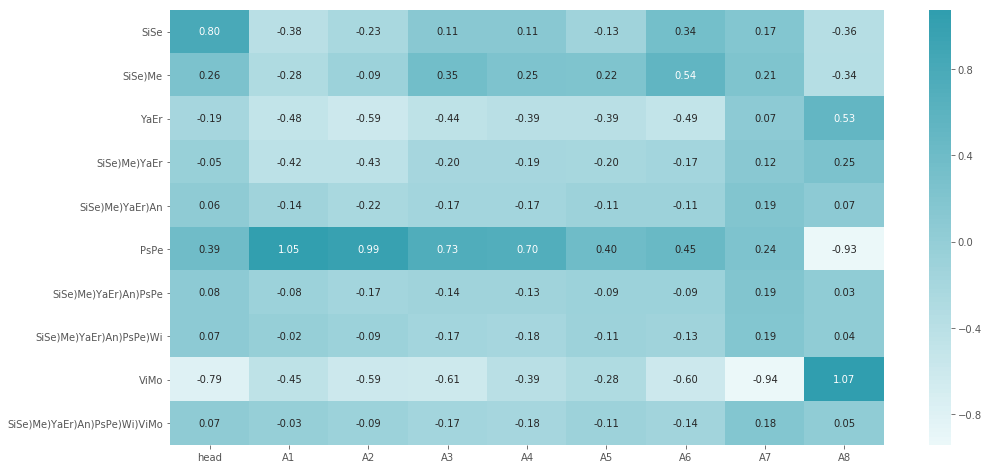

In [40]:

ancestral_spe_list = ["SiSe","SiSe)Me","YaEr","SiSe)Me)YaEr","SiSe)Me)YaEr)An", "PsPe","SiSe)Me)YaEr)An)PsPe","SiSe)Me)YaEr)An)PsPe)Wi", 
                      "ViMo","SiSe)Me)YaEr)An)PsPe)Wi)ViMo"]

MeanPheAncestralDF = pd.DataFrame.from_dict(MeanPheVectorAncestral, orient='index').reindex(ancestral_spe_list)



sns.heatmap( MeanPheAncestralDF,annot=True, fmt=".2f",
               cmap=sns.light_palette((210, 90, 60), input="husl", n_colors=100))    
plt.savefig('plots/clustermap average phenotpe ancestrals')

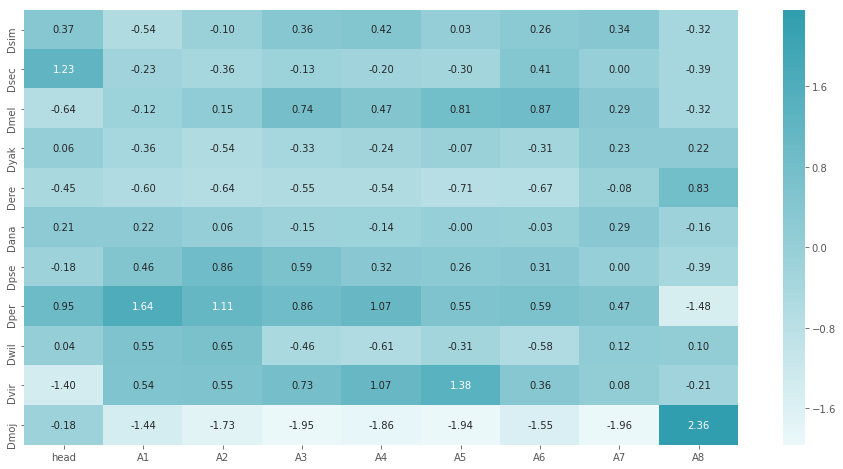

In [41]:
MeanPheAllspeDF = pd.DataFrame.from_dict(MeanPheVectorAllSpe, orient='index').reindex(species_list)
sns.heatmap( MeanPheAllspeDF, annot=True, fmt=".2f",
               cmap=sns.light_palette((210, 90, 60), input="husl", n_colors=100))
plt.savefig('plots/clustermap average phenotype')


# calculating the delta Z for all populations

In [23]:
DeltaZ = {}
DeltaZ['A->Dsec'] = MeanPheVectorAllSpe['Dsec'] - MeanPheVectorAncestral['SiSe']
DeltaZ['A->Dsim'] = MeanPheVectorAllSpe['Dsim'] - MeanPheVectorAncestral['SiSe']
DeltaZ['A->Dpse'] = MeanPheVectorAllSpe['Dpse'] - MeanPheVectorAncestral['PsPe']
DeltaZ['A->Dper'] = MeanPheVectorAllSpe['Dper'] - MeanPheVectorAncestral['PsPe']
DeltaZ['A->Dmel'] = MeanPheVectorAllSpe['Dmel'] - MeanPheVectorAncestral['SiSe)Me']
DeltaZ['A->Dyak'] = MeanPheVectorAllSpe['Dyak'] - MeanPheVectorAncestral['YaEr']
DeltaZ['A->Dere'] = MeanPheVectorAllSpe['Dere'] - MeanPheVectorAncestral['YaEr']
DeltaZ['A->Dmoj'] = MeanPheVectorAllSpe['Dmoj'] - MeanPheVectorAncestral['ViMo']
DeltaZ['A->Dvir'] = MeanPheVectorAllSpe['Dvir'] - MeanPheVectorAncestral['ViMo']
DeltaZ['A->Dwil'] = MeanPheVectorAllSpe['Dwil'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi']
DeltaZ['A->Dana'] = MeanPheVectorAllSpe['Dana'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An']


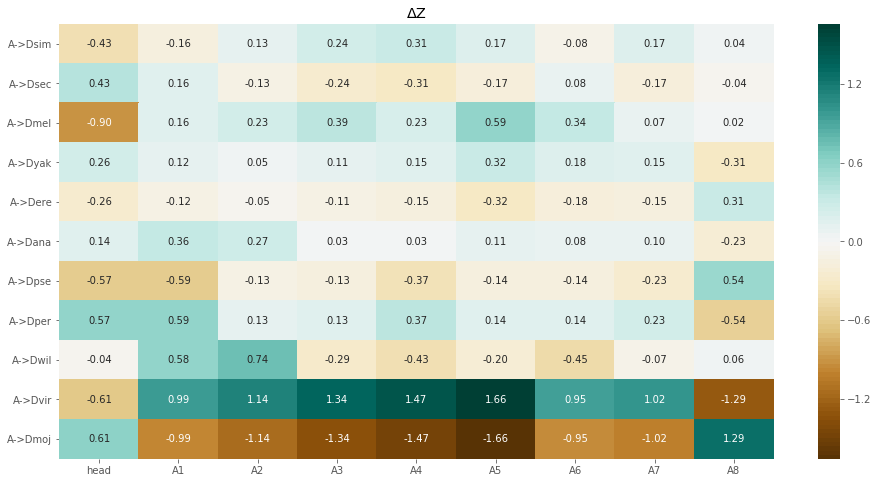

In [24]:
DeltaZDF = pd.DataFrame.from_dict(DeltaZ, orient='index').reindex(['A->' + i for i in species_list])
sns.heatmap( DeltaZDF, annot=True, fmt=".2f",
               cmap=sns.color_palette("BrBG", n_colors=100))
plt.title(r'$\Delta$Z')
plt.savefig('plots/deltaZ heatmap')

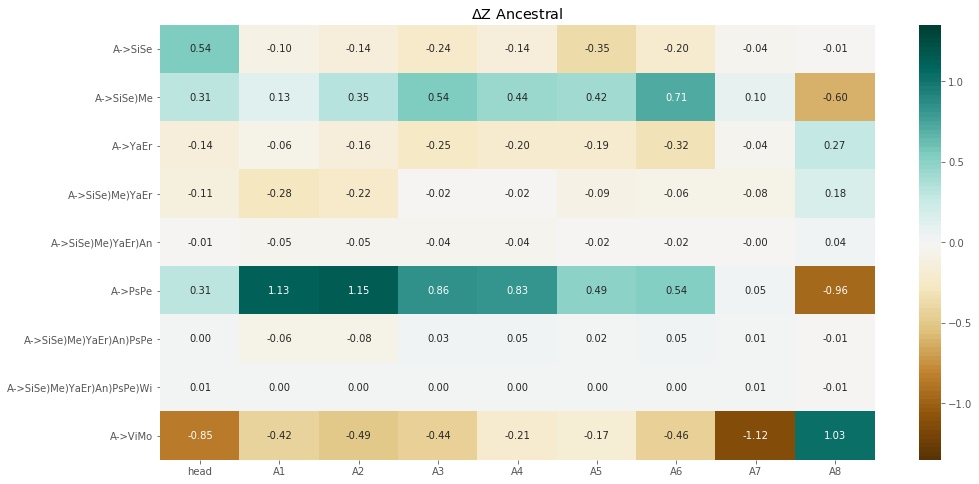

In [25]:
DeltaZA = {}
DeltaZA['A->SiSe'] = MeanPheVectorAncestral['SiSe'] - MeanPheVectorAncestral['SiSe)Me']
DeltaZA['A->SiSe)Me'] = MeanPheVectorAncestral['SiSe)Me'] - MeanPheVectorAncestral['SiSe)Me)YaEr']
DeltaZA['A->YaEr'] = MeanPheVectorAncestral['YaEr'] - MeanPheVectorAncestral['SiSe)Me)YaEr']
DeltaZA['A->SiSe)Me)YaEr'] = MeanPheVectorAncestral['SiSe)Me)YaEr'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An']
DeltaZA['A->SiSe)Me)YaEr)An'] = MeanPheVectorAncestral['SiSe)Me)YaEr)An'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe']
DeltaZA['A->PsPe'] = MeanPheVectorAncestral['PsPe'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe']
DeltaZA['A->SiSe)Me)YaEr)An)PsPe'] = MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi']
DeltaZA['A->SiSe)Me)YaEr)An)PsPe)Wi'] = MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo']
DeltaZA['A->ViMo'] = MeanPheVectorAncestral['ViMo'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo']

DeltaZAncDF = pd.DataFrame.from_dict(DeltaZA, orient='index').reindex(['A->' + i for i in ancestral_spe_list][:-1])
sns.heatmap( DeltaZAncDF, annot=True, fmt=".2f", vmax = 1.35, vmin = -1.35,
               cmap=sns.color_palette("BrBG", n_colors=100)) #vmax = 3000, vmin = -3000,
plt.title(r'$\Delta$Z Ancestral')
plt.savefig('plots/deltaZ Ancestral heatmap')

# calculating ancestral P matrices



In [26]:
PAncestral = {}
PAncestral['SiSe'] = (PmatrixAllSpe['Dsim'] + PmatrixAllSpe['Dsec'])/2
PAncestral['SiSe)Me'] = ((1/54)*PAncestral['SiSe'] + (1/90)*PmatrixAllSpe['Dmel'])/(1/54+1/90)
PAncestral['YaEr'] = (PmatrixAllSpe['Dyak'] + PmatrixAllSpe['Dere'])/2
PAncestral['SiSe)Me)YaEr'] = ((1/95)*PAncestral['SiSe)Me'] + (1/43)*PAncestral['YaEr'])/(1/95+1/43)
PAncestral['SiSe)Me)YaEr)An'] = ((1/695)*PAncestral['SiSe)Me)YaEr'] + (1/880)*PmatrixAllSpe['Dana'])/(1/695+1/880)
PAncestral['PsPe'] = (PmatrixAllSpe['Dpse'] +PmatrixAllSpe['Dper'])/2
PAncestral['SiSe)Me)YaEr)An)PsPe'] = ((1/40)*PAncestral['SiSe)Me)YaEr)An'] + (1/890)*PAncestral['PsPe'])/(1/40+1/890)
PAncestral['SiSe)Me)YaEr)An)PsPe)Wi'] = ((1/110)*PAncestral['SiSe)Me)YaEr)An)PsPe'] + (1/1030)*PmatrixAllSpe['Dwil'])/(1/110+ 1/1030)
PAncestral['ViMo'] = (PmatrixAllSpe['Dvir'] + PmatrixAllSpe['Dmoj'])/2
PAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo'] = ((1/4)*PAncestral['SiSe)Me)YaEr)An)PsPe)Wi'] + (1/434)*PAncestral['ViMo'])/(1/434+1/4)



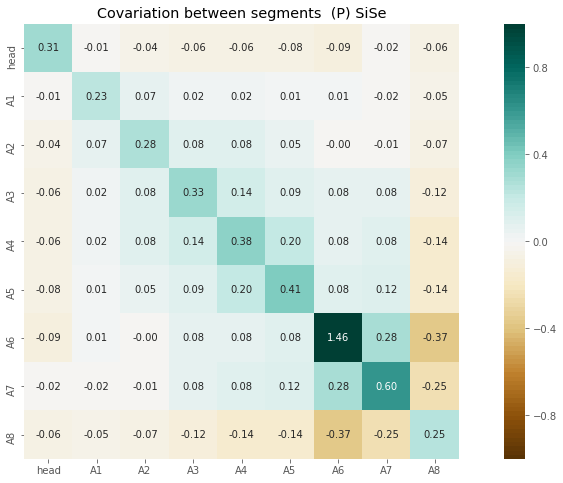

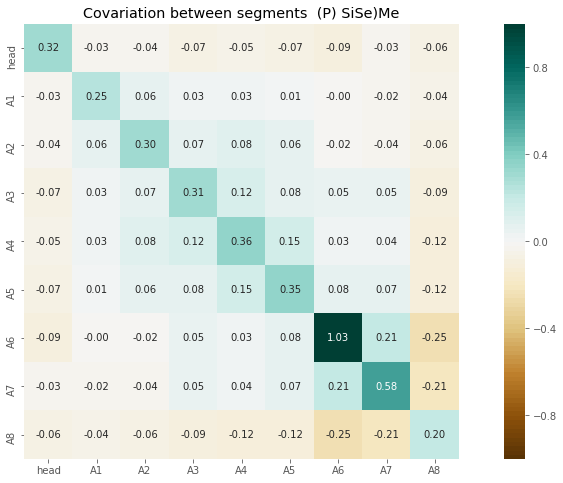

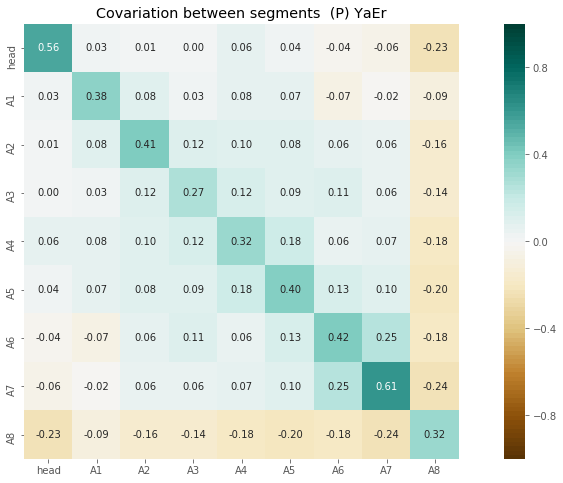

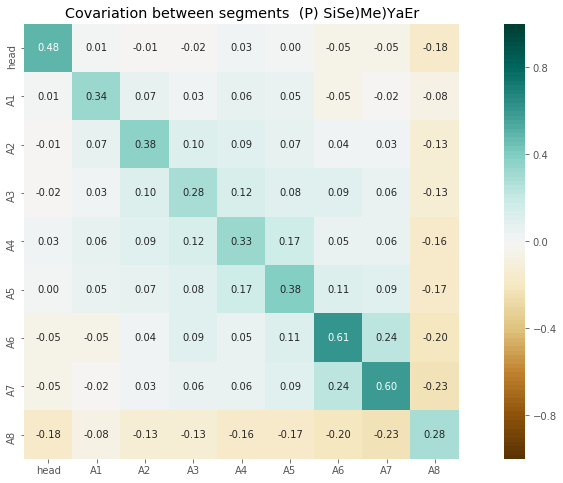

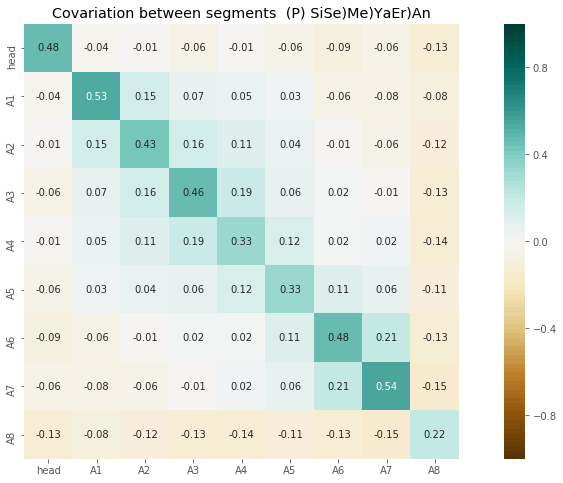

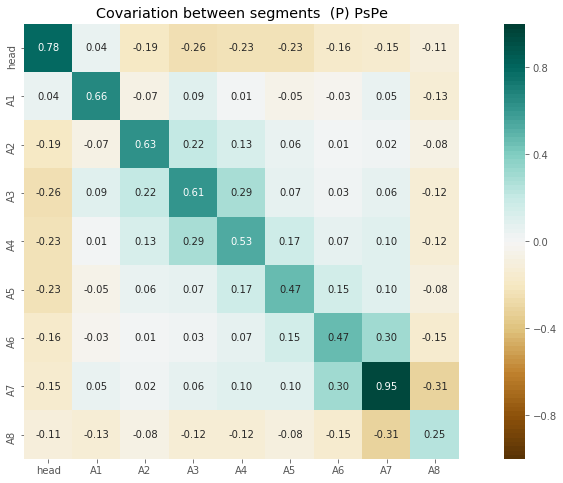

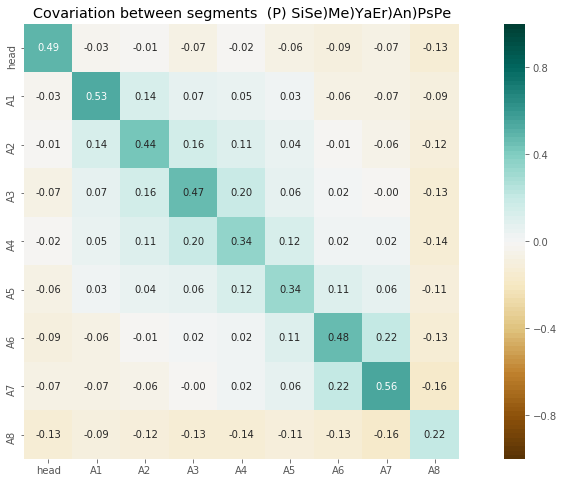

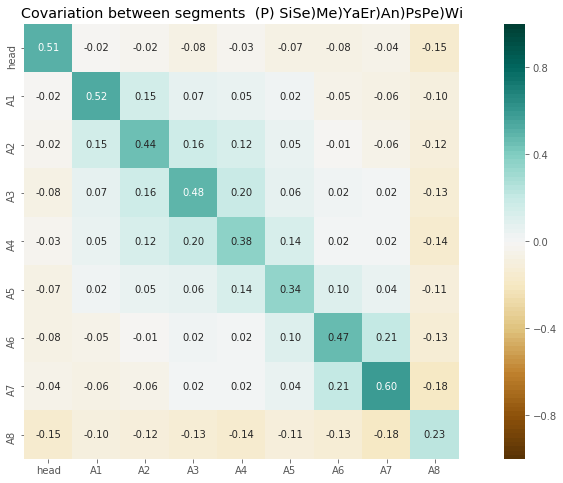

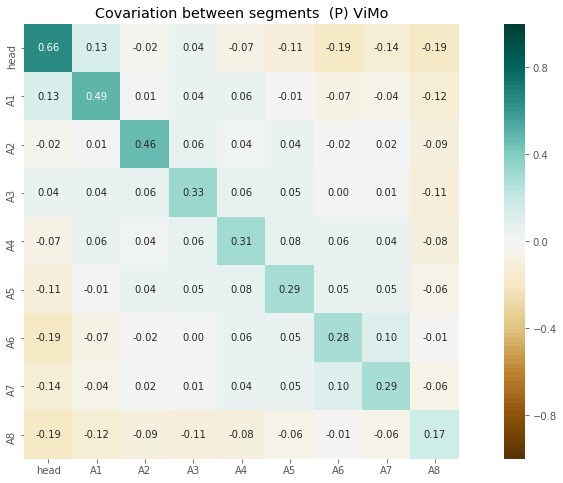

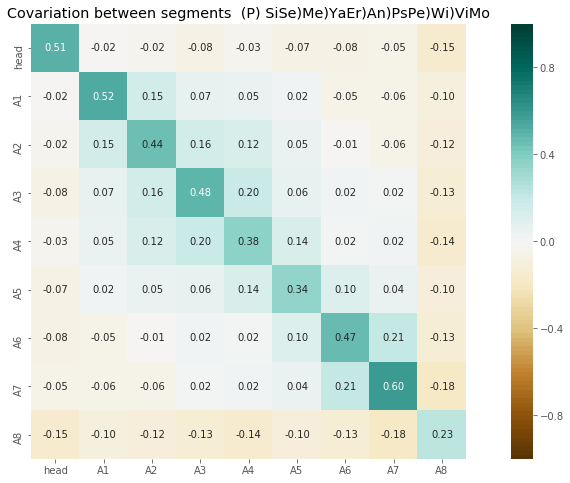

In [45]:
for i in ancestral_spe_list:
    sns.heatmap(PAncestral[i], annot=True, fmt=".2f",vmin = -1, vmax = 1, cmap=sns.color_palette("BrBG", n_colors=100), square=True)
    plt.title('Covariation between segments  (P) '+ i)
    plt.savefig('plots/Covariation between segments '+ i)
    plt.show()

# calculating selection gradients $\beta$

## curent lineages $\beta$

In [28]:
betaselection = {}
betaselection['A->Dsec'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe'].values),
                                        PAncestral['SiSe'].columns, PAncestral['SiSe'].index).dot(DeltaZ['A->Dsec'])
betaselection['A->Dsim'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe'].values),
                                        PAncestral['SiSe'].columns, PAncestral['SiSe'].index).dot(DeltaZ['A->Dsim'])
betaselection['A->Dpse'] = pd.DataFrame(np.linalg.pinv(PAncestral['PsPe'].values),
                                        PAncestral['PsPe'].columns, PAncestral['PsPe'].index).dot(DeltaZ['A->Dpse'])
betaselection['A->Dper'] = pd.DataFrame(np.linalg.pinv(PAncestral['PsPe'].values),
                                        PAncestral['PsPe'].columns, PAncestral['PsPe'].index).dot(DeltaZ['A->Dper'])
betaselection['A->Dmel'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me'].values),
                                        PAncestral['SiSe)Me'].columns, PAncestral['SiSe)Me'].index).dot(DeltaZ['A->Dmel'])
betaselection['A->Dyak'] = pd.DataFrame(np.linalg.pinv(PAncestral['YaEr'].values),
                                        PAncestral['YaEr'].columns, PAncestral['YaEr'].index).dot(DeltaZ['A->Dyak'])
betaselection['A->Dere'] = pd.DataFrame(np.linalg.pinv(PAncestral['YaEr'].values),
                                        PAncestral['YaEr'].columns, PAncestral['YaEr'].index).dot(DeltaZ['A->Dere'])
betaselection['A->Dmoj'] = pd.DataFrame(np.linalg.pinv(PAncestral['ViMo'].values),
                                        PAncestral['ViMo'].columns, PAncestral['ViMo'].index).dot(DeltaZ['A->Dmoj'])
betaselection['A->Dvir'] = pd.DataFrame(np.linalg.pinv(PAncestral['ViMo'].values),
                                        PAncestral['ViMo'].columns, PAncestral['ViMo'].index).dot(DeltaZ['A->Dvir'])
betaselection['A->Dwil'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me)YaEr)An)PsPe)Wi'].values),
                                        PAncestral['SiSe)Me)YaEr)An)PsPe)Wi'].columns, 
                                        PAncestral['SiSe)Me)YaEr)An)PsPe)Wi'].index).dot(DeltaZ['A->Dwil'])
betaselection['A->Dana'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me)YaEr)An'].values),
                                        PAncestral['SiSe)Me)YaEr)An'].columns, PAncestral['SiSe)Me)YaEr)An'].index).dot(DeltaZ['A->Dana'])




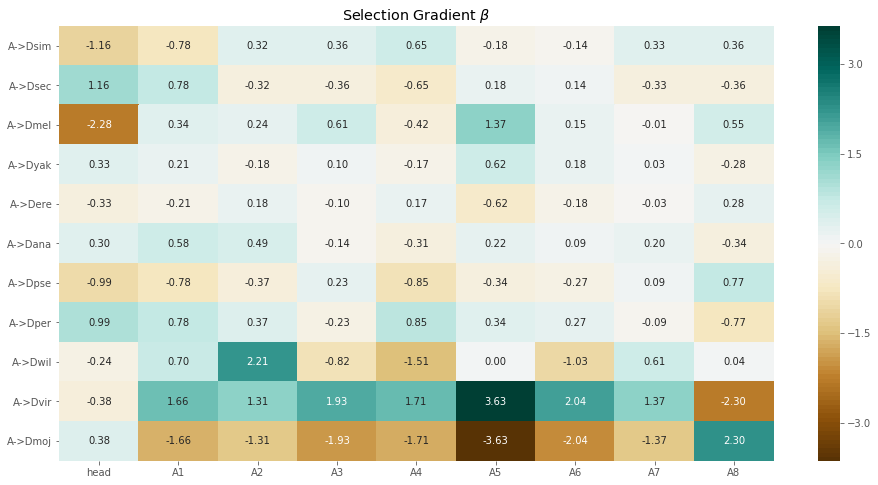

In [29]:
betadf = pd.DataFrame.from_dict(betaselection, orient='index').reindex(['A->' + i for i in species_list])
sns.heatmap( betadf, annot=True, fmt=".2f",
               cmap=sns.color_palette("BrBG", n_colors=100))
plt.title(r'Selection Gradient $\beta$')
plt.savefig('plots/selection gradient curent pop')

## ancestral $\beta$

In [30]:
betaancestral ={}
betaancestral['A->SiSe'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me'].values),
                                        PAncestral['SiSe)Me'].columns, PAncestral['SiSe)Me'].index).dot(DeltaZA['A->SiSe'])
betaancestral['A->SiSe)Me'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me)YaEr'].values),
                                        PAncestral['SiSe)Me)YaEr'].columns, PAncestral['SiSe)Me)YaEr'].index).dot(DeltaZA['A->SiSe)Me'])
betaancestral['A->YaEr'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me)YaEr'].values),
                                        PAncestral['SiSe)Me)YaEr'].columns, PAncestral['SiSe)Me)YaEr'].index).dot(DeltaZA['A->YaEr'])
betaancestral['A->SiSe)Me)YaEr'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me)YaEr)An'].values),
                                        PAncestral['SiSe)Me)YaEr)An'].columns, PAncestral['SiSe)Me)YaEr)An'].index).dot(DeltaZA['A->SiSe)Me)YaEr'])
betaancestral['A->SiSe)Me)YaEr)An'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me)YaEr)An)PsPe'].values),
                                        PAncestral['SiSe)Me)YaEr)An)PsPe'].columns, PAncestral['SiSe)Me)YaEr)An)PsPe'].index).dot(DeltaZA['A->SiSe)Me)YaEr)An'])
betaancestral['A->PsPe'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me)YaEr)An)PsPe'].values),
                                        PAncestral['SiSe)Me)YaEr)An)PsPe'].columns, PAncestral['SiSe)Me)YaEr)An)PsPe'].index).dot(DeltaZA['A->PsPe'])
betaancestral['A->SiSe)Me)YaEr)An)PsPe'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me)YaEr)An)PsPe)Wi'].values),
                                        PAncestral['SiSe)Me)YaEr)An)PsPe)Wi'].columns, PAncestral['SiSe)Me)YaEr)An)PsPe)Wi'].index).dot(DeltaZA['A->SiSe)Me)YaEr)An)PsPe'])
betaancestral['A->SiSe)Me)YaEr)An)PsPe)Wi'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo'].values),
                                        PAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo'].columns, PAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo'].index).dot(DeltaZA['A->SiSe)Me)YaEr)An)PsPe)Wi'])
betaancestral['A->ViMo'] = pd.DataFrame(np.linalg.pinv(PAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo'].values),
                                        PAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo'].columns, PAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo'].index).dot(DeltaZA['A->ViMo'])

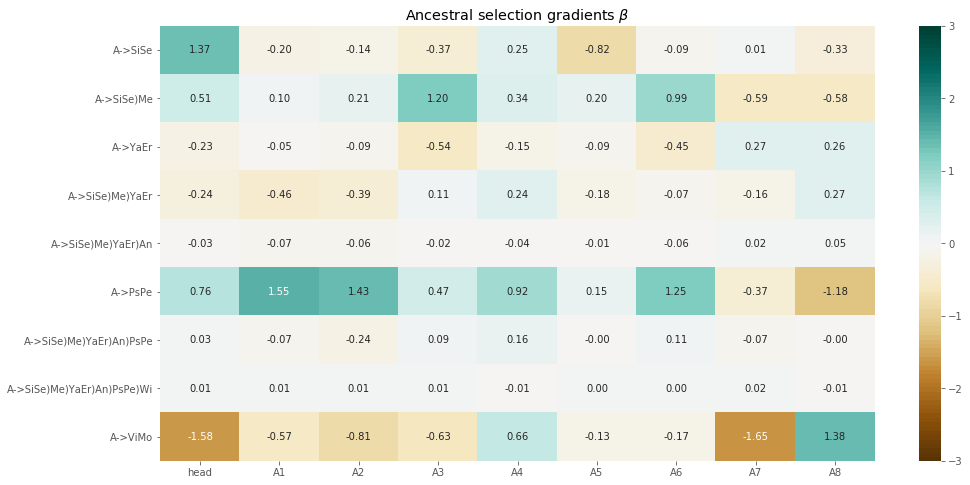

In [31]:
betaAncdf = pd.DataFrame.from_dict(betaancestral, orient='index').reindex(['A->' + i for i in ancestral_spe_list][:-1])
sns.heatmap( betaAncdf, annot=True, fmt=".2f", vmax= 3, vmin = -3,
               cmap=sns.color_palette("BrBG", n_colors=100))
plt.title(r'Ancestral selection gradients $\beta$')
plt.savefig('plots/Ancestral selection gradients')

# calculating PCs and components for every population

In [32]:

from sklearn.decomposition import PCA as sklearnPCA

class PCana:
    def __init__(self, segmentsDF):
        sklearn_pca = sklearnPCA(n_components=4)
        self.PCvalues = sklearn_pca.fit_transform(segmentsDF.values)
        self.varEXP = sklearn_pca.explained_variance_ratio_
        self.PCAComp = sklearn_pca.components_
        
        
        
PCAAllSpe = {}
for i in species_list:
    PCAAllSpe[i] = PCana(newpop[i].iloc[:, :-1])

In [33]:
Amatrix = np.hstack((PCAAllSpe[species_list[0]].PCAComp[:3],np.asmatrix(PCAAllSpe[species_list[0]].varEXP[:3]).T))

for spe in species_list[1:]:
    temp = np.hstack((PCAAllSpe[spe].PCAComp[:3],np.asmatrix(PCAAllSpe[spe].varEXP[:3]).T))
    Amatrix = np.vstack((Amatrix, temp))
    
PCACompPd = pd.DataFrame(Amatrix, columns=['head']+['A'+ str(i) for i in range(1,9)] + ['Explained variance'], index = ['PC'+ str(i)+' ' +spe for spe in species_list for i in range(1,4)])
PCACompPd.head()

head        A1        A2        A3        A4        A5  \
PC1 Dsim  0.001699 -0.051883 -0.037489 -0.115569 -0.205358 -0.324463   
PC2 Dsim  0.426932 -0.317341 -0.400272 -0.306462 -0.475931 -0.323275   
PC3 Dsim  0.679798  0.176191  0.292783  0.117923  0.135859  0.023211   
PC1 Dsec -0.055114  0.010938  0.031482  0.106363  0.101989  0.078560   
PC2 Dsec  0.174232 -0.024855 -0.205385 -0.387951 -0.521418 -0.506801   

                A6        A7        A8  Explained variance  
PC1 Dsim -0.503311 -0.650791  0.397801            0.366688  
PC2 Dsim  0.083038  0.353494  0.004032            0.171545  
PC3 Dsim -0.522429  0.101466 -0.324005            0.149408  
PC1 Dsec  0.925361  0.199902 -0.267789            0.462494  
PC2 Dsec  0.298930 -0.327075  0.226440            0.188281

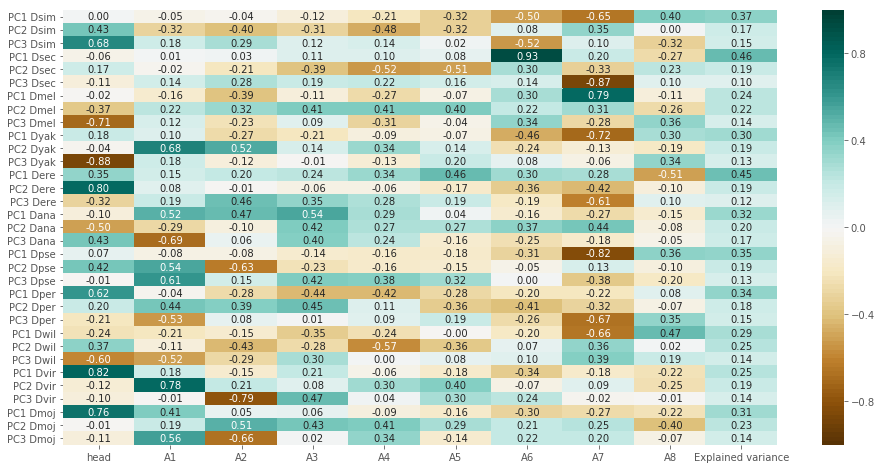

In [34]:
sns.heatmap(PCACompPd, annot=True, fmt=".2f",vmin = -1, vmax = 1, cmap=sns.color_palette("BrBG", n_colors=100))
plt.savefig('plots/PCs good heatmap')

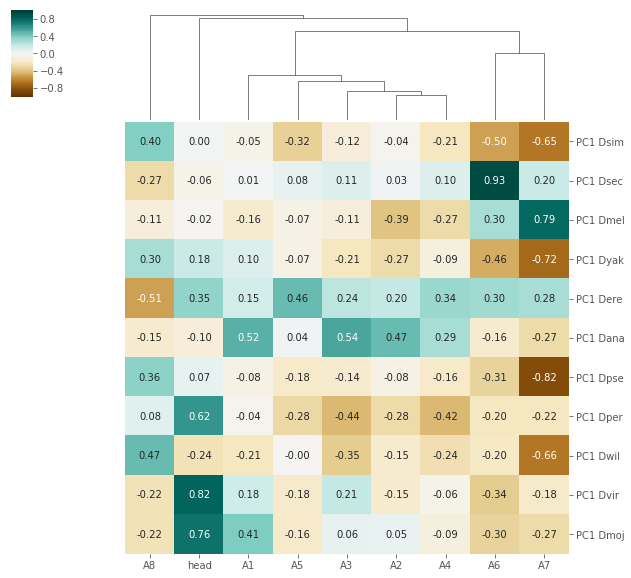

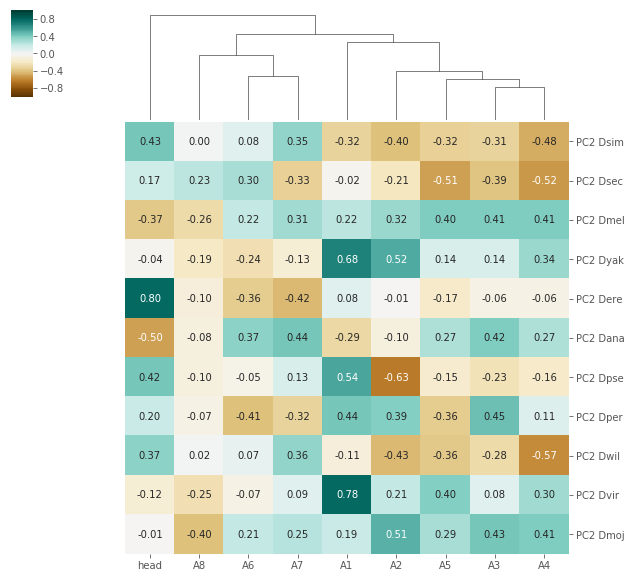

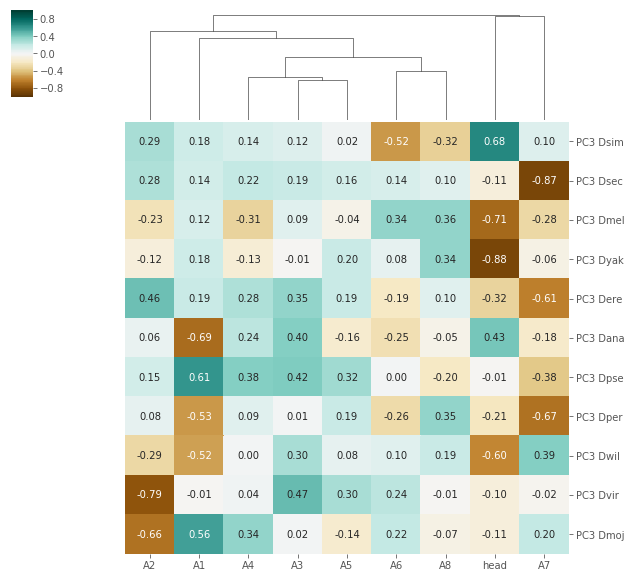

In [35]:
for i in [0,1,2]:
    sns.clustermap(PCACompPd.iloc[i::3, :-1] , annot=True, fmt=".2f",vmin = -1, vmax = 1,row_cluster = False, cmap=sns.color_palette("BrBG", n_colors=100), figsize=(10, 10))
    plt.savefig('plots/clustermap proportion for PC'+ str(i)+'.png')